<a href="https://colab.research.google.com/github/RasmusKanne/MLME-Miniproject/blob/main/ML_MiniProject_RasmusKanne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning for Media Experiences (MLME) Mini-Project Report: Rasmus Kanne Mikkelsen - 18/11/2024**

# *1. Framing the Problem at the Big Picture Level*

To start off the first step is to look at the big picture and frame the problem at hand.

This project is based on the HTRU2 dataset by R. J. Lyon (DOI: https://doi.org/10.24432/C5DK6R) which describes a collection of pulsar candidates collected during the High Time Resolution Universe Survey (South).

A pulsar is a rare type of neutron star that produces radio emissions detectable on Earth which is caused by their rotation which sends an emission beam across the sky. When this beam crossses our line of sight it produces a detectable periodic pattern of broadband radio emissions through large radio telescopes.

The main objective is a binary classification problem in that the models goal is to destinquish legitimate pulsar readings from radio frequency interference (RFI) and noise. The model should therefore help to eleviate the manual labor of classifying the sensor data to facilitate more rapid analysis.

In conlusion the problem is a supervised learning binary classification problem. The model should therefore train on the labeled data which has been checked by human annotators to classify the samples into either 0. RFI/noise or 1. Pulsar. As the features that define a pulsar is relatively fixed and does not change a lot over time, batch learning should be sufficient for this implementation.

# *2. Getting the Data*

The second step is to download the dataset and put the features and targets into variables.

In this case it is done by first installing the package "ucimlrepo" which contains the dataset, then fetching the specific data set as a pandas frame:

In [ ]:
pip install ucimlrepo

In [ ]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# fetch dataset
htru2 = fetch_ucirepo(id=372)

# dataset as a pandas dataframe
pdhtru2 = htru2.data.original

# splitting data into features (X) and targets (y)
X = htru2.data.features
y = htru2.data.targets

# *3. Exploring and Visualizing the Data to Gain Insights*

The third step is to then explore and visualize the data to understand and gain insights.

First we can take a quick look at the Data Structure using the Head() function to look at the first five rows in the dataset. From this we can see that each row represent a pulsar candidate sample, which each are described by 8 attributes which are all numerical.

In [ ]:
# Looking at the first five rows
pdhtru2.head()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


Using the info() method shows a quick description of the data. In this case it shows that there are 17898 entries (rows) and that there are no missing values in any of the attributes (columns).

In [ ]:
# Quick overview of the entire dataset
pdhtru2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Profile_mean      17898 non-null  float64
 1   Profile_stdev     17898 non-null  float64
 2   Profile_skewness  17898 non-null  float64
 3   Profile_kurtosis  17898 non-null  float64
 4   DM_mean           17898 non-null  float64
 5   DM_stdev          17898 non-null  float64
 6   DM_skewness       17898 non-null  float64
 7   DM_kurtosis       17898 non-null  float64
 8   class             17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


To get more information about the destribution of one attribute the method value_counts() can be used. From using this on the binary "class" attribute we can see that the destribution between the 0. Noise and 1. Pulsar are skewed heavily in the favor of noise (16259) compared to pulsar (1639) instances.

In [ ]:
# A view of the distribution of the target value class
pdhtru2["class"].value_counts()

,count
class,
0,16259
1,1639


Using the describe() methods helps to show a summary of all the numerical values.

In [ ]:
# A summary of all the numerical values and their distributions in a dataframe
pdhtru2.describe()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


To visualize the datasets attributes' distribution the method hist() from the package matplotlib can be used to create a histogram of each of the attributes. From this we can see that many of the distributions are heavily skewed towards lower values. Other than this the attributes has very different scales which needs to be addressed.

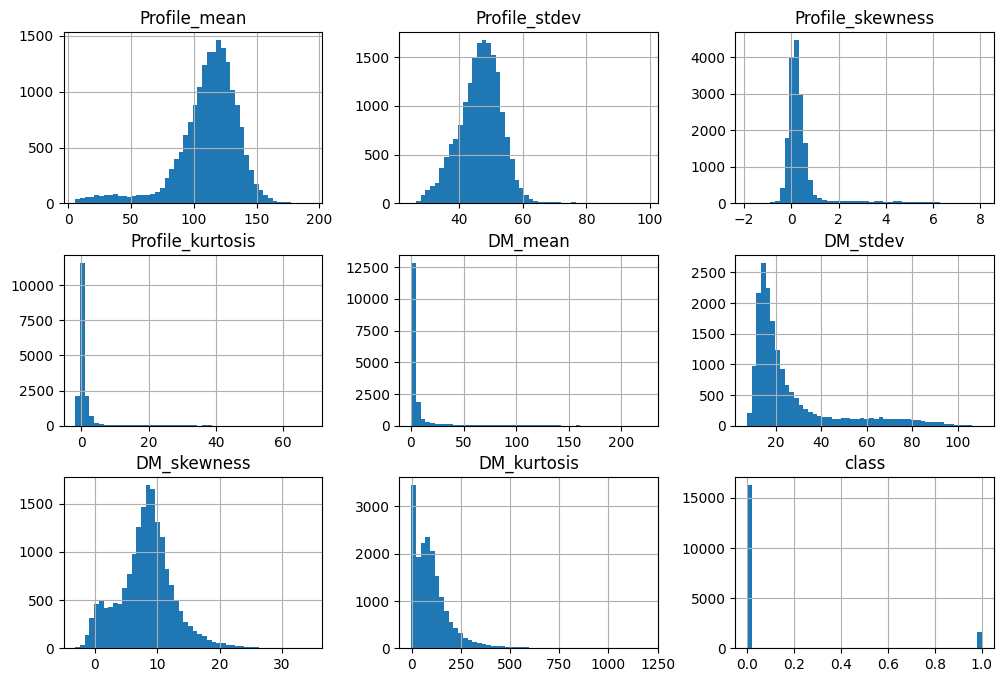

In [ ]:
# Visualizing the distributions of the features using histograms from matplotlib
import matplotlib.pyplot as plt

pdhtru2.hist(bins=50, figsize=(12,8))
plt.show()

To look for correlations between the different attributes we can use the standard correlation coefficient (Pearson's r) to compare each attribute with each other in a correlation matrix using the corr() method.

From this we can see that "Profile_skewness" has the highest correlation (0.79) followed by "Profile_kurtosis" (0.71) and "Profile_mean" (-0.67)

In [ ]:
# Calculating the pearson's r correlation between each feature and the target value
corr_matrix = pdhtru2.corr()

corr_matrix["class"].sort_values(ascending=False)

,class
class,1.000000
Profile_skewness,0.791591
Profile_kurtosis,0.709528
DM_stdev,0.491535
DM_mean,0.400876
DM_kurtosis,-0.259117
Profile_stdev,-0.363708
DM_skewness,-0.390816
Profile_mean,-0.673181


To visualize all the correlations in the dataset a scatter matrix can be used. This shows a scatterplot correlation between each of the numerical attributes. This helps to see if there is any non-linear correlations as the standard correlation only measures linear correlations.

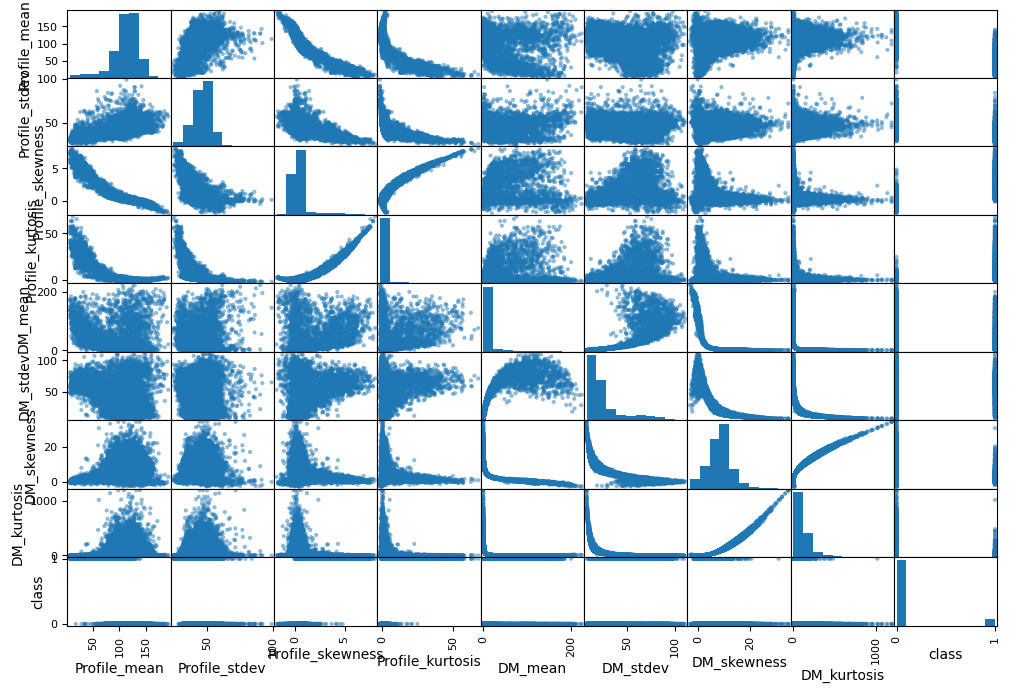

In [ ]:
# Visualizing the correlations between each feature with each other using matplotlibs scatter_matrix() function
from pandas.plotting import scatter_matrix

scatter_matrix(pdhtru2, figsize=(12,8))
plt.show()

# *4. Preparing the Data for Machine Learning Algorithms*

Before going any further it is important to split the dataset into a training set and a test set. This is done to avoid creating "data snooping" bias where by just looking at the data used for testing could create bias and lead to overfitting.

Using the package scikit.learn's train_test_split() method we can define how much data we set aside with the test_size input variable and ensure we get the same output by setting a random_state variable.

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into a training and test set
train_set, test_set = train_test_split(pdhtru2, test_size=0.2, random_state=47)

# Testing to see if the split worked properly by looking at length
print(len(train_set))
print(len(test_set))

# Splitting the training and test set into X and y
X_train = train_set.drop("class", axis=1)
y_train = train_set["class"].copy()

X_test = test_set.drop("class", axis=1)
y_test = test_set["class"].copy()

14318
3580


After exploring and understanding the data it is important to prepare the data, by scaling and transforming it to fit the training methods. In this case

In [ ]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Defining what features to transform
features_to_transform = ['Profile_skewness', 'Profile_kurtosis', 'DM_mean', 'DM_kurtosis', 'DM_stdev']
X_train_to_transform = X_train[features_to_transform]
X_test_to_transform = X_test[features_to_transform]

# Checks if values are below zero to avoid creating NaN values when doing Logarithmic transformation
print(X_train_to_transform.describe())

# Creating a transformer for log transformation with + 2 since some values goes down to -1.97.
def log_transform_with_constant(X):
    return np.log(X + 2)  # Adds 2 before log
log_transformer = FunctionTransformer(log_transform_with_constant)

# Logarithmic transformation on the heavily skewed features
X_train_transformed = log_transformer.fit_transform(X_train_to_transform)
X_test_transformed = log_transformer.transform(X_test_to_transform)

# Ensuring no NaN (null) values
print(X_train_transformed.info())

# Combining transformed features back into the dataframe
X_train_final = pd.concat([X_train.drop(columns=features_to_transform), pd.DataFrame(X_train_transformed, columns=features_to_transform, index=X_train.index)], axis=1)
X_test_final = pd.concat([X_test.drop(columns=features_to_transform), pd.DataFrame(X_test_transformed, columns=features_to_transform, index=X_test.index)], axis=1)

       Profile_skewness  Profile_kurtosis       DM_mean   DM_kurtosis  \
count      14318.000000      14318.000000  14318.000000  14318.000000   
mean           0.481252          1.786367     12.514774    104.333374   
std            1.066185          6.254140     29.109745    105.418152   
min           -1.876011         -1.781888      0.213211     -1.976976   
25%            0.029152         -0.189108      1.925585     34.778693   
50%            0.225147          0.202834      2.801421     83.003725   
75%            0.475785          0.929772      5.464256    139.231854   
max            8.069522         68.101622    222.421405   1191.000837   

           DM_stdev  
count  14318.000000  
mean      26.363864  
std       19.469678  
min        7.370432  
25%       14.450300  
50%       18.482047  
75%       28.441263  
max      110.642211  
<class 'pandas.core.frame.DataFrame'>
Index: 14318 entries, 2694 to 5255
Data columns (total 5 columns):
 #   Column            Non-Null Count  

I have chosen to use standardization to scale the data, as the data is heavily skewed and to avoid sensitivity to outliers. This is done by using scikit-learns StandardScaler() to fit and transform the data.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Creating the scaler object
scaler = StandardScaler()

# Scaling the features of both the training and test set
X_train_scaled = scaler.fit_transform(X_train_final)

X_test_scaled = scaler.transform(X_test_final)

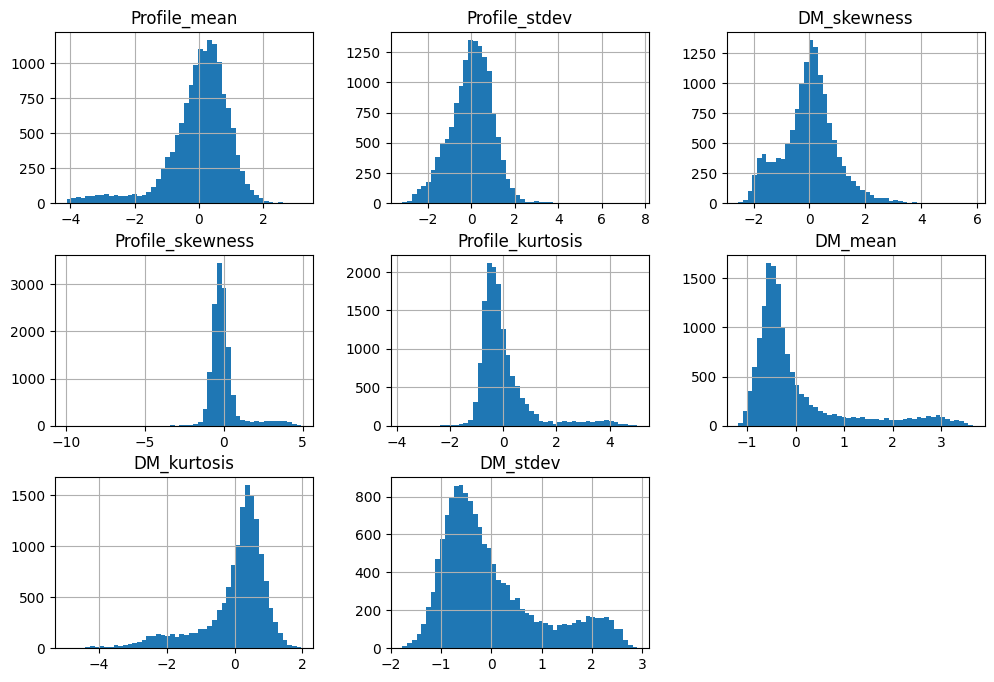

In [ ]:
# Checking if the scaling worked by plotting the distribution again
pd_X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_final.columns, index=X_train_final.index)
pd_X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_final.columns, index=X_test_final.index)
pd_X_train_scaled.hist(bins=50, figsize=(12,8))
plt.show()

After the pre-processing done we select the final features which is going to be used in the training of the models. As mentioned during the exploration of the data the most correlated features were "Profile_skewness" (0.79) followed by "Profile_kurtosis" (0.71) and "Profile_mean" (-0.67). Therefore to avoid having too many unnessecary features and avoid the curse of dimensionality, we just start off by using those three to train the models.

In [ ]:
# Seperating the 3 most correlated features to use in training
selected_features = ['Profile_skewness', 'Profile_kurtosis', 'Profile_mean']
X_train_selected = pd_X_train_scaled[selected_features]
X_test_selected = pd_X_test_scaled[selected_features]

print(X_train_selected.info())  # Check the first few rows

<class 'pandas.core.frame.DataFrame'>
Index: 14318 entries, 2694 to 5255
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Profile_skewness  14318 non-null  float64
 1   Profile_kurtosis  14318 non-null  float64
 2   Profile_mean      14318 non-null  float64
dtypes: float64(3)
memory usage: 447.4 KB
None


## Principle Component Analysis (PCA)

Another method to find the most optimal features are doing dimensionality reduction like Principle Component Analysis (PCA) to try and find the three most correlated features that inherits the most of datasets variance. This makes sense in this case because the features seems to be heavily correlated with each other and this could create a more generalizable model than the individual features from the data.

In [ ]:
from sklearn.decomposition import PCA

# Initializing the PCA and fitting it to the transformed training set
pca = PCA()
X_train_pca = pca.fit_transform(pd_X_train_scaled)
X_test_pca = pca.transform(pd_X_test_scaled)

principal_components = pca.components_

# Checking the explained variance ratio for each principal component
print(f'Variance Ratio: {pca.explained_variance_ratio_}')

Variance Ratio: [0.58029065 0.30468105 0.06666279 0.02066037 0.01152514 0.00757396
 0.00577117 0.00283487]


To find the most optimal amount of dimensions needed to preseve the most optimal amount of variance from the dataset we can calculate the cumulative sum of the explained variance ratio compared to the amount of dimensions to detect when the variance drops off.

The number of dimensions required to preserve 95% of the variance is: 3
Variance Ratio: 0.9516344958208105


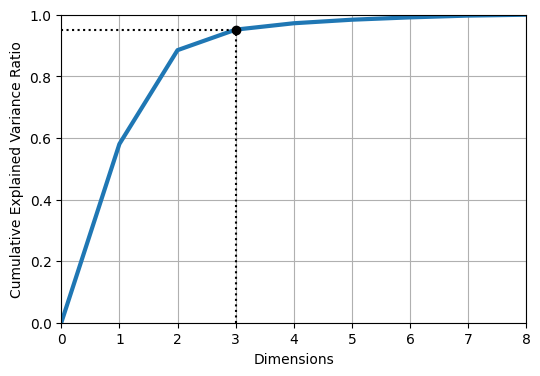

In [ ]:
# Calculating the cumalative sum of the variance ratios
cumsum = np.cumsum(pca.explained_variance_ratio_)

# Checking at what amount of dimensions the cumulative sum is at least 95%
d = np.argmax(cumsum >= 0.95) + 1
print('The number of dimensions required to preserve 95% of the variance is:', d)

# Fitting the pca with the new found optimal number of dimensions
pca_optimized = PCA(n_components=d)
X_train_pca = pca_optimized.fit_transform(pd_X_train_scaled)
X_test_pca = pca_optimized.transform(pd_X_test_scaled)

# Calculating the variance ratio for the optimized PCA
variance_ratio_d = np.sum(pca_optimized.explained_variance_ratio_)
print(f'Variance Ratio: {variance_ratio_d}')

# Adding a 0 value for when there is no dimensions to make the graph look better
cumsum = np.insert(cumsum, 0, 0)

# Plotting the dimensionality to variance ratio graph
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 8, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, variance_ratio_d, "ko")
plt.grid(True)
plt.show()

Since the features are in three dimensional feature space, we can look at the shape of the data by plotting the data into a three dimensional graph. This can be done using plotly, which create an interactive 3D scatterplot that shows all data points based on the selected features or PCA seperated by color for the class.

In [ ]:
# Visualizing the three dimensional feature spaces
import plotly.express as px

# Setting up the dataframes
selected_features_df = pd.DataFrame(X_train_selected, columns=selected_features)
selected_features_df['class'] = y_train  # Add target variable for color

pca_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2', 'PC3'])  # Take first 3 PCs
pca_df['class'] = y_train  # Add target variable for color

In [ ]:
# Visualizing the selected features in three dimensional plotly graph
fig_selected = px.scatter_3d(selected_features_df, x='Profile_skewness', y='Profile_kurtosis', z='Profile_mean',
                    color='class', symbol='class',
                    title="Selected Features 3D Scatter Plot")
fig_selected.show()

In [ ]:
# Visualizing the PCA features in three dimensional plotly graph
fig_pca = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3',
                    color='class', symbol='class',
                    title="PCA Components 3D Scatter Plot")
fig_pca.show()

Looking at these two graphs it is clear that the selected features are much more visibly seperatable than the PCA, as there seems to be a quite clear distinquish between the two colors while in the PCA it seems the opposite.

# *5. Selecting a Model and Training it*

After transforming and scaling the data to better fit the training algorithms, it is time to choose and train a model. To start off it is best to try the simplest of models and then go up in complexity as we want the simplest model with the best results to maximise generalizability and reduce overfitting.

## Stochasctic Gradient Descent (SGD) Classifier

The first model to try is the Stochastic Gradient Descent Classifier as it is capable of handling large datasets efficiently since it trains on individual instances independently.

In [ ]:
# Training the SGD Classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(class_weight='balanced', random_state=47)
sgd_clf.fit(X_train_selected, y_train)

SGDClassifier(class_weight='balanced', random_state=47)

To see how well the SGD classifer worked we can do a cross validation to then create a confusion matrix to visualize the prediction accuracy. To get a score for the overall performance taking into account both precision and recall we can use the F1 score which is the harmonic mean of the precision and recall.

From running this we can see that the model has a high accuracy (0.98), but that the recall is relatively low (0.79) compared to the precision (0.96). This could indicate that the decision method's threshold used could be improved to get a better distribution between recall and precision as the f1 score is at (0.86).

In [ ]:
# Importing methods from scikit-learn
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

# Defining a method for calculating and printing all relevant metrics
def Calculate_Metrics(clf, X_train, y_train):
  # Computing the confusion matrix
  y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
  conf_mx = confusion_matrix(y_train, y_train_pred)
  print(conf_mx)

  # Calculating the Cross Validation Accuracy
  accuracy = cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")
  print(f"Cross Validation Accuracy: {accuracy} Mean: {accuracy.mean()}")

  # Calculating Recall and Precision
  precision = precision_score(y_train, y_train_pred)
  print(f"Precision: {precision}")
  recall = recall_score(y_train, y_train_pred)
  print(f"Recall: {recall}")

  # Calculating f1 Score
  f1 = f1_score(y_train, y_train_pred)
  print(f"F1 Score: {f1}")

  return y_train_pred, conf_mx, accuracy, precision, recall, f1

In [ ]:
# Calling the calculate metrics method
y_train_pred_sgd, conf_mx_sgd, accuracy_sgd, precision_sgd, recall_sgd, f1_sgd = Calculate_Metrics(sgd_clf, X_train_selected, y_train)

[[12627   377]
 [  139  1175]]
Cross Validation Accuracy: [0.96522103 0.95600251 0.9706622 ] Mean: 0.9639619150915667
Precision: 0.7570876288659794
Recall: 0.8942161339421614
F1 Score: 0.8199581297976274


Another way to visualize and test the effectiveness of the specific classifer is using either a Precision-Recall (PR) curve or a Receiver Operating Characteristic (ROC) curve. Both curves are useful for showing the models effectiveness compared to each other. For this case the PR-curve is preferred as the positive class is rare compared to the negative. The PR-curve therefore is better at accurately showing the true effectiveness of the model compared to the ROC-curve.

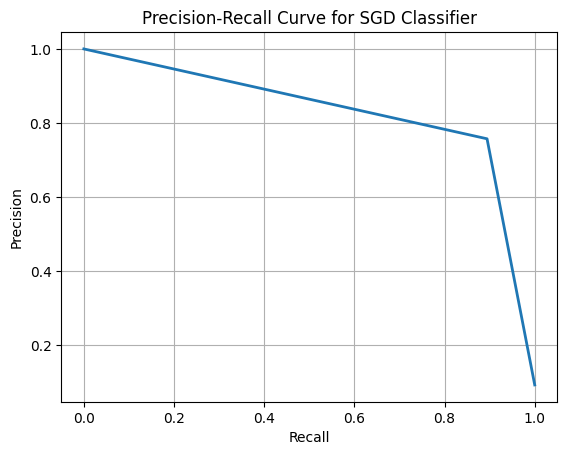

PRAUC: 0.8305059112965134


In [ ]:
# Creating a PR curve for finding the best threshold
from sklearn.metrics import precision_recall_curve, auc

# Finding all the decision function scores
y_scores_sgd = cross_val_predict(sgd_clf, X_train_selected, y_train, cv=3, method="decision_function")

precisions_sgd, recalls_sgd, thresholds_sgd = precision_recall_curve(y_train, y_train_pred_sgd)

# Plotting the PR curve
plt.plot(recalls_sgd, precisions_sgd, linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for SGD Classifier")
plt.grid(True)
plt.show()

# Calculate the PRAUC using the auc function
prauc_sgd = auc(recalls_sgd, precisions_sgd)
print(f"PRAUC: {prauc_sgd}")

## Decision Tree Classifier

In the report from which the dataset was from, they define that the use of a tree based classifier as the preffered model. We therefore compare how a simple decision tree classifier model compares to the SGD. A decision tree classifier are simple, fast and interpretable and can often capture non-linear relationships, but can be limited in its expressiveness and be prone to instability and overfitting.

In [ ]:
# Training the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(class_weight='balanced', random_state=47)
dt_clf.fit(X_train_selected, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=47)

In [ ]:
# Running the Calculate_Metrics() method
y_train_pred_dt, conf_mx_dt, accuracy_dt, precision_dt, recall_dt, f1_dt = Calculate_Metrics(dt_clf, X_train_selected, y_train)

[[12761   243]
 [  245  1069]]
Cross Validation Accuracy: [0.96522103 0.96857322 0.96395641] Mean: 0.9659168905937849
Precision: 0.8147865853658537
Recall: 0.8135464231354642
F1 Score: 0.8141660319878141


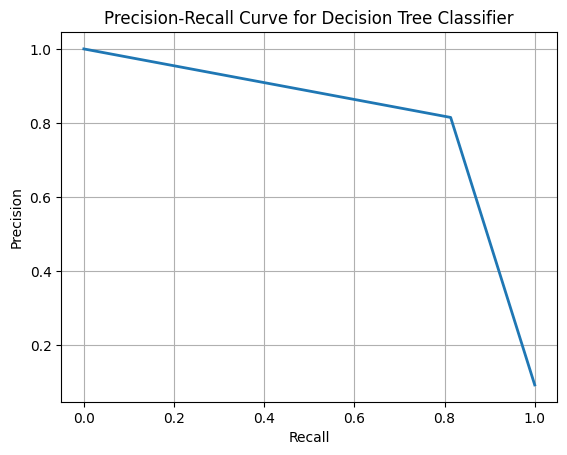

PRAUC: 0.8227221684495695


In [ ]:
#PR Curve for Decision Tree Classifier

# Finding all the decision function scores
y_probas_dt = cross_val_predict(dt_clf, X_train_selected, y_train, cv=3, method="predict_proba")

# We're interested in the probability of the positive class (pulsar)
y_scores_dt = y_probas_dt[:, 1]

# Calculate precision, recall, and thresholds
precisions_dt, recalls_dt, thresholds_dt = precision_recall_curve(y_train, y_scores_dt)

# Plotting the PR curve
plt.plot(recalls_dt, precisions_dt, linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Decision Tree Classifier")
plt.grid(True)
plt.show()

# Calculate the PRAUC using the auc function
prauc_dt = auc(recalls_dt, precisions_dt)
print(f"PRAUC: {prauc_dt}")

### Visualizing the Decision Tree

Since decision trees are very simply consists of a series of if statements it is easy to visualize and understand the logic behind the predictions. This can be done by using the graphviz package to visualize the tree.

To make it more simple to understand we can set the hyperparameter "max_depth" to something low as to make the tree easier to understand.

In [ ]:
# Creating a smaller decision tree model by setting the max_depth parameter to 3
small_dt_clf = DecisionTreeClassifier(max_depth=2, class_weight='balanced', random_state=47)
small_dt_clf.fit(X_train_selected, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=47)

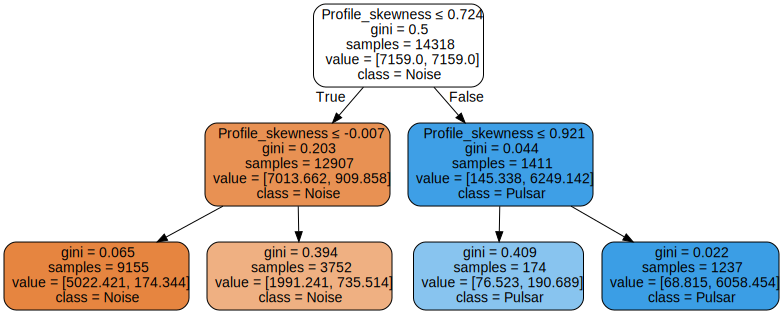

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Creating and exporting the graphviz to a temporary dot file
dot_data = export_graphviz(small_dt_clf,
                           out_file=None,
                           feature_names=selected_features,  # Use your feature names
                           class_names=['Noise', 'Pulsar'],  # Use your class names
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Visualizes the graph using graphviz and the dot file
graph = graphviz.Source(dot_data)
graph

In [ ]:
# Checking the metrics for the smaller tree model
y_train_pred_small_dt, conf_mx_small_dt, accuracy_small_dt, precision_small_dt, recall_small_dt, f1_small_dt = Calculate_Metrics(small_dt_clf, X_train_selected, y_train)

[[12678   326]
 [  164  1150]]
Cross Validation Accuracy: [0.95537398 0.97255395 0.96940486] Mean: 0.9657775965403794
Precision: 0.7791327913279132
Recall: 0.8751902587519026
F1 Score: 0.8243727598566308


From this visualization we can see that the "Profile_skewness" feature is the feature that most reliably splits the target value as it is used in the first few nodes.

## Support Vector Machine (SVM) Classifier

A more complex model than the sgd and decision tree to compare would then be support vector machines (SVM). A SVM classifier is optimal in dataset with clear margins of seperation between different classes in the feature space and can be very flexible. Problems with svm's are that they are computational expensive and sensitive to hyperparameters tuning as the shape of the data compared to the kernel used can vary a lot in its effectiveness.

In [ ]:
# Training the SVM Classifier
from sklearn.svm import SVC

svm_clf = SVC(class_weight='balanced',random_state=47)
svm_clf.fit(X_train_selected, y_train)

SVC(class_weight='balanced', random_state=47)

In [ ]:
# Running the Calculate_Metrics() method
y_train_pred_svm, conf_mx_svm, accuracy_svm, precision_svm, recall_svm, f1_svm = Calculate_Metrics(svm_clf, X_train_selected, y_train)

[[12796   208]
 [  151  1163]]
Cross Validation Accuracy: [0.97360151 0.97737272 0.97380553] Mean: 0.9749265874385272
Precision: 0.8482859226841721
Recall: 0.8850837138508372
F1 Score: 0.8662942271880819


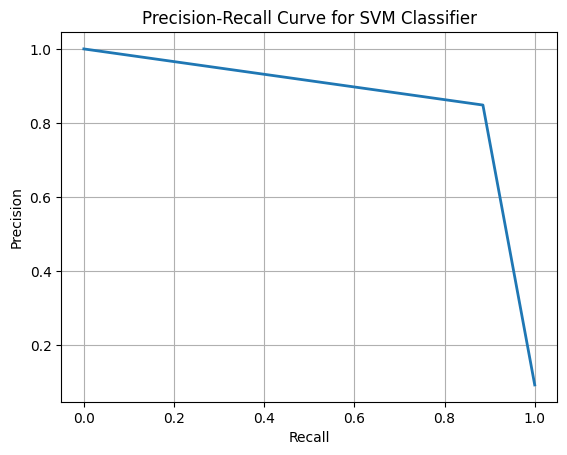

PRAUC: 0.8719579011003026


In [ ]:
#PR Curve for SVM Classifier

# Finding all the decision function scores
y_scores_svm = cross_val_predict(svm_clf, X_train_selected, y_train, cv=3, method="decision_function")

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_train_pred_svm)

# Plotting the PR curve
plt.plot(recalls_svm, precisions_svm, linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for SVM Classifier")
plt.grid(True)
plt.show()

# Calculate the PRAUC using the auc function
prauc_svm = auc(recalls_svm, precisions_svm)
print(f"PRAUC: {prauc_svm}")

##Random Forest

To test a more complex tree-based classifier model we try training a Random Forest Classifier which is an ensemble method of combining a number of decision trees together. By utilizing bagging and feature randomness the model avoids overfitting better than individual trees and improves accuracy and complexity. The downsides are that it is more computational expensive than many simpler models and require more memory as well as taking longer to compute a prediction.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Training the Random Forest Classifier
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=47)
rf_clf.fit(X_train_selected, y_train)

RandomForestClassifier(class_weight='balanced', random_state=47)

In [ ]:
# Running the Calculate_Metrics() method
y_train_pred_rf, conf_mx_rf, accuracy_rf, precision_rf, recall_rf, f1_rf = Calculate_Metrics(rf_clf, X_train_selected, y_train)

[[12923    81]
 [  212  1102]]
Cross Validation Accuracy: [0.97737272 0.98302954 0.9782062 ] Mean: 0.9795361551926008
Precision: 0.9315300084530854
Recall: 0.8386605783866058
F1 Score: 0.8826591910292351


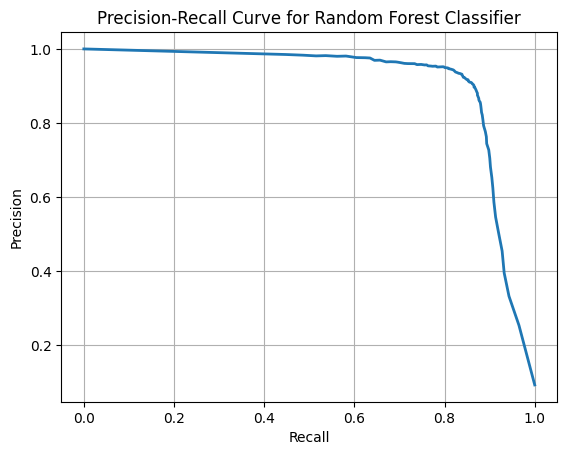

PRAUC: 0.9095495113956611


In [ ]:
#PR Curve for Random Forest Classifier

# Finding all the decision function scores
y_probas_rf = cross_val_predict(rf_clf, X_train_selected, y_train, cv=3, method="predict_proba")

# We're interested in the probability of the positive class (pulsar)
y_scores_rf = y_probas_rf[:, 1]

# Calculate precision, recall, and thresholds
precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_train, y_scores_rf)

# Plotting the PR curve
plt.plot(recalls_rf, precisions_rf, linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Random Forest Classifier")
plt.grid(True)
plt.show()

# Calculate the PRAUC using the auc function
prauc_rf = auc(recalls_rf, precisions_rf)
print(f"PRAUC: {prauc_rf}")

## PCA

### Random Forest

After trying to train all the models on the three most correlated features, we can now compare them to the use of the PCA dimensions calculated earlier. This could possibly give a more robust, efficient and generalizable model as removing dimensionality helps to reduce the effects of the curse of dimensionality. Problems arise with PCA as their could be a loss of information and could even lead to worse performance than the original data.

In [ ]:
# Training the Random Forest Classifier
pca_rf_clf = RandomForestClassifier(class_weight='balanced', random_state=47)
pca_rf_clf.fit(X_train_pca, y_train)

RandomForestClassifier(class_weight='balanced', random_state=47)

In [ ]:
# Running the Calculate_Metrics() method
y_train_pred_pca_rf, conf_mx_pca_rf, accuracy_pca_rf, precision_pca_rf, recall_pca_rf, f1_pca_rf = Calculate_Metrics(pca_rf_clf, X_train_selected, y_train)

[[12923    81]
 [  212  1102]]
Cross Validation Accuracy: [0.97737272 0.98302954 0.9782062 ] Mean: 0.9795361551926008
Precision: 0.9315300084530854
Recall: 0.8386605783866058
F1 Score: 0.8826591910292351


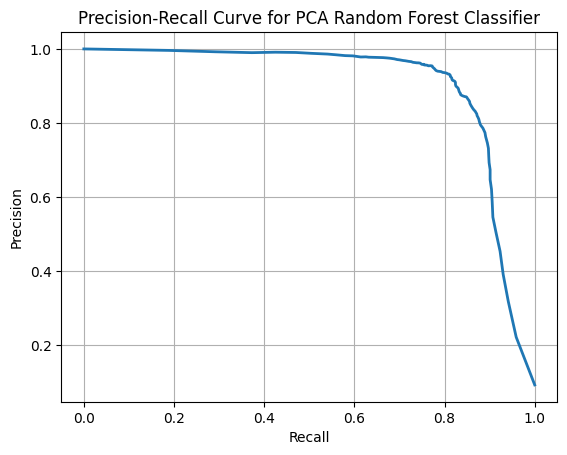

PRAUC: 0.9046947171003438


In [ ]:
#PR Curve for PCA Random Forest Classifier

# Finding all the decision function scores
y_probas_pca_rf = cross_val_predict(pca_rf_clf, X_train_pca, y_train, cv=3, method="predict_proba")

# We're interested in the probability of the positive class (pulsar)
y_scores_pca_rf = y_probas_pca_rf[:, 1]

# Calculate precision, recall, and thresholds
precisions_pca_rf, recalls_pca_rf, thresholds_pca_rf = precision_recall_curve(y_train, y_scores_pca_rf)

# Plotting the PR curve
plt.plot(recalls_pca_rf, precisions_pca_rf, linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for PCA Random Forest Classifier")
plt.grid(True)
plt.show()

# Calculate the PRAUC using the auc function
prauc_pca_rf = auc(recalls_pca_rf, precisions_pca_rf)
print(f"PRAUC: {prauc_pca_rf}")

### SVM

Since SVM's are sensitive to the orientation and seperability of features it could be an improvement to train the model on dimensional reduced dataset to see if the data is easier for it to seperate.

In [ ]:
# Training the SVM Classifier
from sklearn.svm import SVC

pca_svm_clf = SVC(class_weight='balanced',random_state=47)
pca_svm_clf.fit(X_train_pca, y_train)

SVC(class_weight='balanced', random_state=47)

In [ ]:
# Running the Calculate_Metrics() method
y_train_pred_pca_svm, conf_mx_pca_svm, accuracy_pca_svm, precision_pca_svm, recall_pca_svm, f1_pca_svm = Calculate_Metrics(pca_svm_clf, X_train_selected, y_train)

[[12796   208]
 [  151  1163]]
Cross Validation Accuracy: [0.97360151 0.97737272 0.97380553] Mean: 0.9749265874385272
Precision: 0.8482859226841721
Recall: 0.8850837138508372
F1 Score: 0.8662942271880819


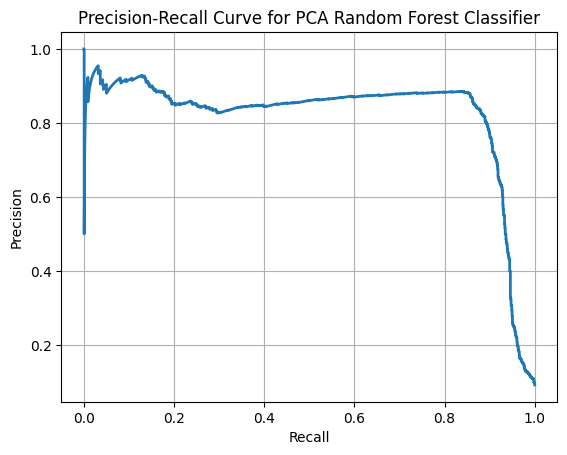

PRAUC: 0.8200683218467517


In [ ]:
#PR Curve for PCA SVM Classifier

# Finding all the decision function scores
y_scores_pca_svm = cross_val_predict(pca_svm_clf, X_train_pca, y_train, cv=3, method="decision_function")

# Calculate precision, recall, and thresholds
precisions_pca_svm, recalls_pca_svm, thresholds_pca_svm = precision_recall_curve(y_train, y_scores_pca_svm)

# Plotting the PR curve
plt.plot(recalls_pca_svm, precisions_pca_svm, linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for PCA Random Forest Classifier")
plt.grid(True)
plt.show()

# Calculate the PRAUC using the auc function
prauc_pca_svm = auc(recalls_pca_svm, precisions_pca_svm)
print(f"PRAUC: {prauc_pca_svm}")

## Comparison of the Models

Now that all models have been trained and hase been evaluated individually, we are able to compare them to each other to get an overview of how well they work.

In this case it makes sense to compare their PR curves as the target values distribution between 0, noise and 1, pulsars are heavily skewed towards the negative class noise. The PR curve therefore is a better metric and representation of the actual effectiveness of the models as precision and recall takes more into account the distribution of the target classes than the ROC curve which just looks at overall accuracy no matter the distribution.

                      PRAUC
SGD                0.830506
Decision Tree      0.822722
SVM                0.871958
Random Forest      0.909550
PCA Random Forest  0.904695
PCA SVM            0.820068


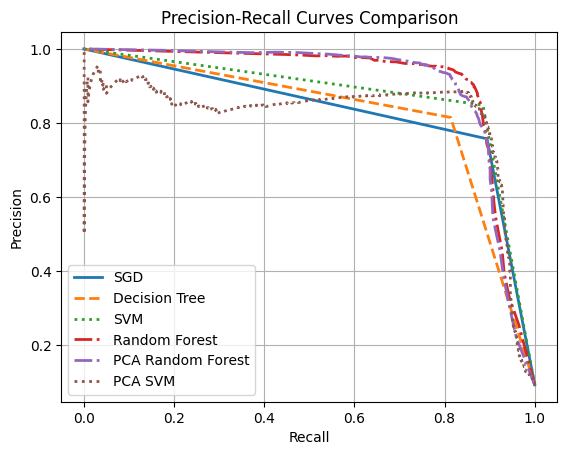

In [ ]:
# Summarizing the PR Area Under the Curve (PRAUC) metric
prauc_scores = {
    'SGD': prauc_sgd,
    'Decision Tree': prauc_dt,
    'SVM': prauc_svm,
    'Random Forest': prauc_rf,
    'PCA Random Forest': prauc_pca_rf,
    'PCA SVM': prauc_pca_svm
}

prauc_df = pd.DataFrame(prauc_scores, index=['PRAUC']).T
print(prauc_df)

# Plotting all the different models using their PR curves
plt.plot(recalls_sgd, precisions_sgd, linestyle='-', linewidth=2, label="SGD")
plt.plot(recalls_dt, precisions_dt, linestyle='--', linewidth=2, label="Decision Tree")
plt.plot(recalls_svm, precisions_svm, linestyle=':', linewidth=2, label="SVM")
plt.plot(recalls_rf, precisions_rf, linestyle='-.', linewidth=2, label="Random Forest")
plt.plot(recalls_pca_rf, precisions_pca_rf, linestyle='-.', linewidth=2, label="PCA Random Forest")
plt.plot(recalls_pca_svm, precisions_pca_svm, linestyle=':', linewidth=2, label="PCA SVM")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves Comparison")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

From this we can see that the most effective model when taking into account the precision and recall is the Random Forest using the original dataset compared to the PCA.

Comparing this to the ROC curves of the models would not have shown this, as seen below, since the overall accuracy seems to be a lot closer between the models.

                        AUC
SGD                0.932613
Decision Tree      0.897430
SVM                0.934544
Random Forest      0.916216
PCA Random Forest  0.916216
PCA SVM            0.934544


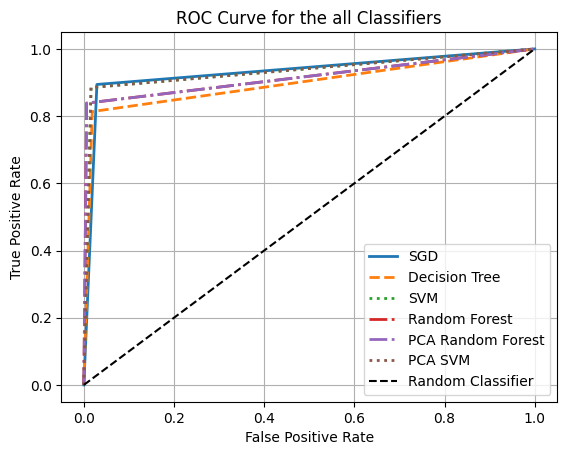

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculating ROC AUC for each model
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train, y_train_pred_sgd)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_train, y_train_pred_dt)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_train, y_train_pred_svm)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, y_train_pred_rf)
fpr_pca_rf, tpr_pca_rf, thresholds_pca_rf = roc_curve(y_train, y_train_pred_pca_rf)
fpr_pca_svm, tpr_pca_svm, thresholds_pca_svm = roc_curve(y_train, y_train_pred_pca_svm)

# Calculating AUC
auc_sgd = roc_auc_score(y_train, y_train_pred_sgd)
auc_dt = roc_auc_score(y_train, y_train_pred_dt)
auc_svm = roc_auc_score(y_train, y_train_pred_svm)
auc_rf = roc_auc_score(y_train, y_train_pred_rf)
auc_pca_rf = roc_auc_score(y_train, y_train_pred_pca_rf)
auc_pca_svm = roc_auc_score(y_train, y_train_pred_pca_svm)

# Summarizing the ROC Area Under the Curve (AUC) metric
auc_scores = {
    'SGD': auc_sgd,
    'Decision Tree': auc_dt,
    'SVM': auc_svm,
    'Random Forest': auc_rf,
    'PCA Random Forest': auc_pca_rf,
    'PCA SVM': auc_pca_svm
}

auc_df = pd.DataFrame(auc_scores, index=['AUC']).T
print(auc_df)

# Plotting all the different models using their ROC curves
plt.plot(fpr_sgd, tpr_sgd, linestyle='-', linewidth=2, label="SGD")
plt.plot(fpr_dt, tpr_dt, linestyle='--', linewidth=2, label="Decision Tree")
plt.plot(fpr_svm, tpr_svm, linestyle=':', linewidth=2, label="SVM")
plt.plot(fpr_rf, tpr_rf, linestyle='-.', linewidth=2, label="Random Forest")
plt.plot(fpr_pca_rf, tpr_pca_rf, linestyle='-.', linewidth=2, label="PCA Random Forest")
plt.plot(fpr_pca_svm, tpr_pca_svm, linestyle=':', linewidth=2, label="PCA SVM")

plt.plot([0,1], [0,1], 'k--', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for the all Classifiers")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

To directly compare all the metrics between the models we can see that the Random Forest is the one with the largest f1 score of (0,866) similar to the SVM, but with a higher recall compared to the SVM's precision.

In this case recall seems to be the more important metric compared to precision as this model is supposed to be a first filter for analysing and finding pulsars in a sea of noise. F1 is therefor also important as to optimize the time and efficiency of the analysis. The main objective is therefore to ensure relevant pulsar candidates are preserved as to be further analysed by the astrophysicists.

In [ ]:
# Creating a data frame for all the metrics
data = {
    'Model': ['SGD', 'Decision Tree', 'SVM', 'Random Forest', "PCA Random Forest", "PCA SVM"],
    'Accuracy': [accuracy_sgd.mean(), accuracy_dt.mean(), accuracy_svm.mean(), accuracy_rf.mean(), accuracy_pca_rf.mean(), accuracy_pca_svm.mean()],
    'Precision': [precision_sgd, precision_dt, precision_svm, precision_rf, precision_pca_rf, precision_pca_svm],
    'Recall': [recall_sgd, recall_dt, recall_svm, recall_rf, recall_pca_rf, recall_pca_svm],
    'F1 Score': [f1_sgd, f1_dt, f1_svm, f1_rf, f1_pca_rf, f1_pca_svm],
    'PRAUC': [prauc_sgd, prauc_dt, prauc_svm, prauc_rf, prauc_pca_rf, prauc_pca_svm],
    'AUC': [auc_sgd, auc_dt, auc_svm, auc_rf, auc_pca_rf, auc_pca_svm]
}

# Making the dataframe into a pandas data frame
metrics_df = pd.DataFrame(data)

# Visualizing the dataframe
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score,PRAUC,AUC
0,SGD,0.963962,0.757088,0.894216,0.819958,0.830506,0.932613
1,Decision Tree,0.965917,0.814787,0.813546,0.814166,0.822722,0.897430
2,SVM,0.974927,0.848286,0.885084,0.866294,0.871958,0.934544
3,Random Forest,0.979536,0.931530,0.838661,0.882659,0.909550,0.916216
4,PCA Random Forest,0.979536,0.931530,0.838661,0.882659,0.904695,0.916216
5,PCA SVM,0.974927,0.848286,0.885084,0.866294,0.820068,0.934544


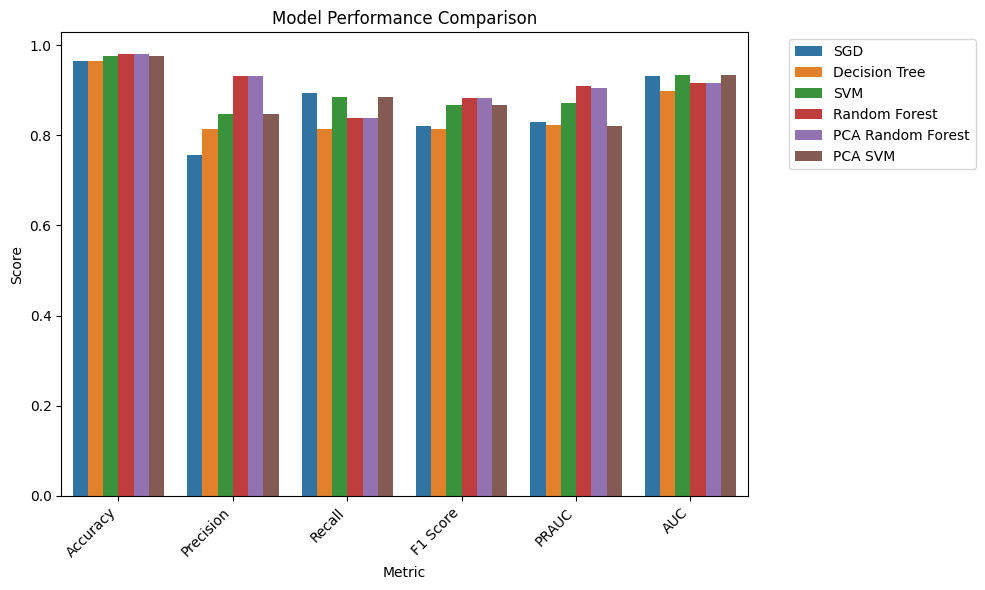

In [ ]:
import seaborn as sns

metrics_df_melted = pd.melt(metrics_df, id_vars=['Model'], var_name='Metric', value_name='Score')
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_df_melted)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#*6. Fine-Tuning the Model*

After finding a set of promising models it is time to fine-tune their hyperparameters to get the best fitting model. This can be done with either Grid Search or Randomized Search techniques which trains the model on different hyperparameter pairs to see which one gives the best fit.

To start off with I have chosen to use a randomized search method as to find relatively good fitting hyperparameters in a larger parameter space comparing to defining a set of parameters using gridsearch.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

## Random Forest

In [ ]:
# Defining the hyperparamater distributions for a randomized search
param_distribs_rf = {
    'n_estimators': randint(low=100, high=500),  # Number of trees in the forest
    'max_depth': randint(low=1, high=30),  # Maximum depth of each tree
}

# Defining the relevant metrics for fine-tuning
random_search_rf = RandomizedSearchCV(
        rf_clf,
        param_distributions=param_distribs_rf,
        n_iter=20,  # Number of parameter settings that are sampled
        cv=3,  # Cross-validation folds
        scoring='f1', # Evaluation Metric
        random_state=47,
        n_jobs=-1, # Available CPU Cores
    )

# Fitting the random search to to the training data
random_search_rf.fit(X_train_selected, y_train)

# Printing the best hyperparameter values found during fine-tuning
best_params_rf = random_search_rf.best_params_
print("Best Parameters: ", best_params_rf)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Best Parameters:  {'max_depth': 12, 'n_estimators': 165}


In [ ]:
# Training a new random forest classifier based on the best parameters from the fine-tuning
final_rf_clf = RandomForestClassifier(n_estimators=best_params_rf['n_estimators'], max_depth=best_params_rf['max_depth'], class_weight='balanced', random_state=47)
final_rf_clf.fit(X_train_selected, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=165,
                       random_state=47)

In [ ]:
# Calculating the Metrics for the fine-tuned random forest classifier
y_train_pred_final_rf, conf_mx_final_rf, accuracy_final_rf, precision_final_rf, recall_final_rf, f1_final_rf = Calculate_Metrics(final_rf_clf, X_train_selected, y_train)

[[12906    98]
 [  187  1127]]
Cross Validation Accuracy: [0.97842028 0.98344856 0.97841576] Mean: 0.9800948680605205
Precision: 0.92
Recall: 0.8576864535768646
F1 Score: 0.8877510831035841


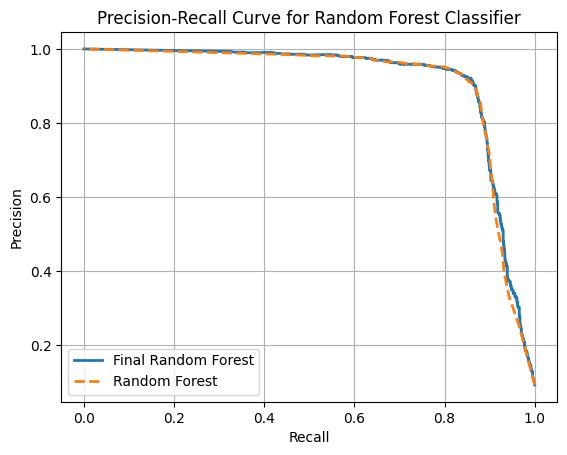

In [ ]:
#PR Curve for Final Random Forest Classifier

# Finding all the decision function scores
y_probas_final_rf = cross_val_predict(final_rf_clf, X_train_selected, y_train, cv=3, method="predict_proba")

# We're interested in the probability of the positive class (pulsar)
y_scores_final_rf = y_probas_final_rf[:, 1]

# Calculate precision, recall, and thresholds
precisions_final_rf, recalls_final_rf, thresholds_final_rf = precision_recall_curve(y_train, y_scores_final_rf)

# Plotting the PR curve compared to the original random forest classifier
plt.plot(recalls_final_rf, precisions_final_rf, linestyle='-', linewidth=2, label="Final Random Forest")
plt.plot(recalls_rf, precisions_rf, linestyle='--', linewidth=2, label="Random Forest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Random Forest Classifier")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

##SVM

As the SVM also had a tied highest f1 score with the random forest classifier we can try and fine tune the SVM using a grid search. By using grid search it is possible to try different kernels + coeffiecients to better fit the shape of the data which could have a big effect on how seperative the features are.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_svm = {
       'C': [1, 2.5, 5],  # Regularization parameter
       'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
       'gamma': ['scale', 0.1, 1] # Kernel coefficient
   }

grid_search_svm = GridSearchCV(
           svm_clf,
           param_grid_svm,
           cv=3,  # Number of cross-validation folds
           scoring='f1',  # Evaluation metric
           n_jobs=-1,  # Use all available CPU cores
           verbose=2 # Level of verbosity
       )

grid_search_svm.fit(X_train_selected, y_train)

best_params_svm = grid_search_svm.best_params_
print("Best Parameters: ", best_params_svm)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters:  {'C': 2.5, 'gamma': 'scale', 'kernel': 'poly'}


In [ ]:
final_svm_clf = SVC(C=best_params_svm['C'], kernel=best_params_svm['kernel'], gamma=best_params_svm['gamma'], class_weight='balanced', random_state=47)
final_svm_clf.fit(X_train_selected, y_train)

SVC(C=2.5, class_weight='balanced', kernel='poly', random_state=47)

In [ ]:
# Calculating the Metrics for the fine-tuned random forest classifier
y_train_pred_final_svm, conf_mx_final_svm, accuracy_final_svm, precision_final_svm, recall_final_svm, f1_final_svm = Calculate_Metrics(final_svm_clf, X_train_selected, y_train)

[[12886   118]
 [  183  1131]]
Cross Validation Accuracy: [0.97800126 0.98198198 0.97694887] Mean: 0.9789773691506669
Precision: 0.9055244195356285
Recall: 0.860730593607306
F1 Score: 0.8825595005852517


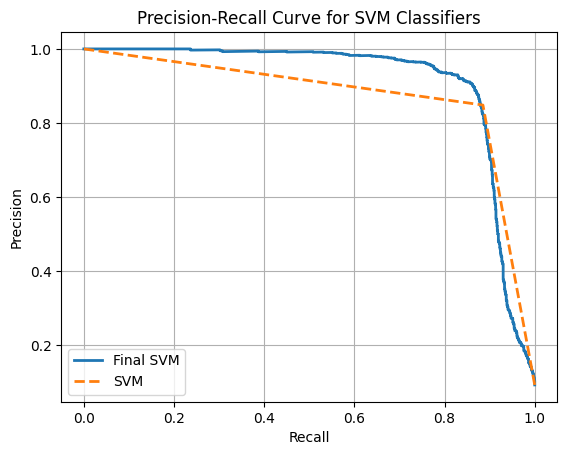

In [ ]:
#PR Curve for Final SVM Classifier

# Finding all the decision function scores
y_scores_final_svm = cross_val_predict(final_svm_clf, X_train_selected, y_train, cv=3, method="decision_function")

# Calculate precision, recall, and thresholds
precisions_final_svm, recalls_final_svm, thresholds_final_svm = precision_recall_curve(y_train, y_scores_final_svm)

# Plotting the PR curve compared to the original svm classifier
plt.plot(recalls_final_svm, precisions_final_svm, linestyle='-', linewidth=2, label="Final SVM")
plt.plot(recalls_svm, precisions_svm, linestyle='--', linewidth=2, label="SVM")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for SVM Classifiers")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

##Comparison of Final Models

Lastly the two final models can be compared using the PR curve. Looking at this shows that both models are almost identical in effectiveness.

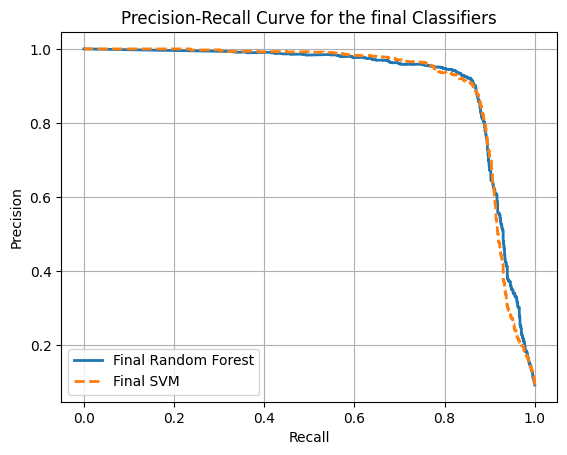

In [ ]:
# Plotting the PR curve compared between the two final classifier
plt.plot(recalls_final_rf, precisions_final_rf, linestyle='-', linewidth=2, label="Final Random Forest")
plt.plot(recalls_final_svm, precisions_final_svm, linestyle='--', linewidth=2, label="Final SVM")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for the final Classifiers")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

#*7. Presenting Soulution*

After fine-tuning the models hyperparameters it is time to put the models to the test and see how well they handled unseen data from the test set. From this we can see if the models have overfitted the training data and evaluate how generalizable they are to new data.

Looking at the results from the two final models on the test dataset, we can see that the f1 scores are close to the cross validation metrics, although slightly lower. This shows that the models are a pretty good fit to the data as it seems to generalize well to new data with only a slight overfit.

In [ ]:
# Testing Final Models on Test Data

# Final Random Forest Classifier
print("Random Forest")
y_train_pred_result_rf, conf_mx_result_rf, accuracy_result_rf, precision_result_rf, recall_result_rf, f1_result_rf = Calculate_Metrics(final_rf_clf, X_test_selected, y_test)

print("")

# Final SVM Classifier
print("SVM")
y_train_pred_result_svm, conf_mx_result_svm, accuracy_result_svm, precision_result_svm, recall_result_svm, f1_result_svm = Calculate_Metrics(final_svm_clf, X_test_selected, y_test)


Random Forest
[[3239   16]
 [  64  261]]
Cross Validation Accuracy: [0.97822446 0.97988265 0.97485331] Mean: 0.9776534717922294
Precision: 0.9422382671480144
Recall: 0.803076923076923
F1 Score: 0.867109634551495

SVM
[[3229   26]
 [  53  272]]
Cross Validation Accuracy: [0.97822446 0.97652976 0.97904443] Mean: 0.977932879447999
Precision: 0.912751677852349
Recall: 0.8369230769230769
F1 Score: 0.8731942215088283


#*8. Launch, Monitor and Maintain*

When considering launching, monitoring and maintaining the models there are some aspects to consider.

Launching:

1. Since the model does not need to update all the time, since the pulsar features should stay similar over time, batch learning should be sufficient making it not necessary to do real-time learning.

2. For deployment it is important to precisely define the full pipeline, from pre-processing to training, to ensure all new data is processed the same when using the model.

Monitoring:

1. Even though it is not real-time training, it is still relevant to keep track of key performance metrics (f1, precision, recall and PRAUC) to understand if the model's performance is degrading over time because of data drift.

2. Implementing some kind of anomaly detection could help detect unusual data points to help spot and highlight areas where the model might need more training data or is inconsistant.

Maintaining:

1. The model might need to be updated if new discoveries change our understanding of pulsars or new methods of detecting them is implemented.

2. Might be an idea to further explore more complex models such as different kinds of ensemble methods or neural networks to find something that works even better than a standard Random Forest or SVM.